In [120]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [121]:
img = cv2.imread("./test/baekhyun_12.jpg")
img.shape

(251, 201, 3)

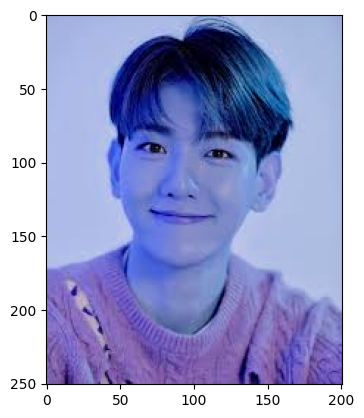

In [122]:
plt.imshow(img)

In [123]:
#rgb formatını kaldırmak için

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(251, 201)

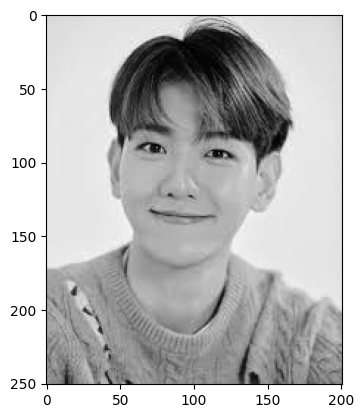

In [124]:
plt.imshow(gray, cmap="gray")

# face detection using HAAR CASCADES >> mesela gözün nerede olduğunu bulmamıza yarıyor

yüz tanıma ve yüz algılama sistemlerinde kullanılan bir sınıflandırıcıdır.

haar cascade yüzleri sınıflandırır ve her yüz için bir harita çıkartır. haar cascade haritalama işleminde birçok tanımlama yapar. tanımlama işlemi yüzdeki bölgelerin parlaklık oranlarının kıyaslanması ile gerçekleştirilir. yüzdeki bir bölge koyuysa oraya siyah şerit, açık renkse beyaz şerit tanımlar. örneğin burun ve burun kenarları farklı parlaklıklara sahiptir. ışığın vurduğu burun kısmı parlaktır ve buraya beyaz şerit, yanlara ise sıyah şerit tanımlar. haar cascade benzer şekilde farklı bölgelere uygun farklı şerit tiplerini uygular ve oluşan çok sayıdaki tanımlama ile yüzü haritalamış olur.



In [125]:
face_cascade = cv2.CascadeClassifier(".\opencv\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(".\opencv\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

# x y width ve height dönmüş oldu

array([[ 32,  42, 124, 124]], dtype=int32)

In [126]:
(x,y,w,h) = faces[0]
x,y,w,h

(32, 42, 124, 124)

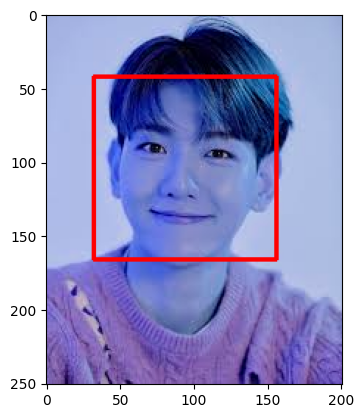

In [127]:
face_img = cv2.rectangle(img,(x,y), (x+w, y+h), (255,0,0),2)
plt.imshow(face_img)

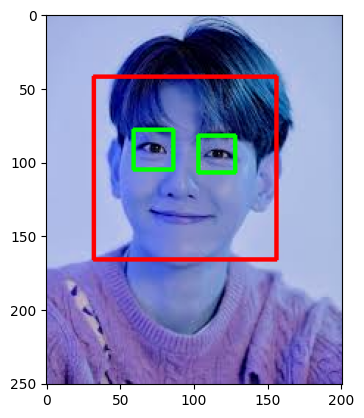

In [128]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y), (x+w, y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey), (ex+ew, ey+eh), (0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap="gray")
plt.show()

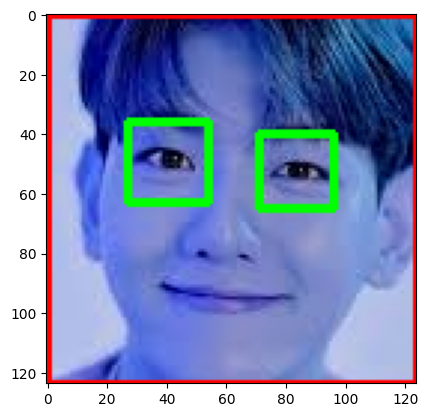

In [129]:
plt.imshow(roi_color, cmap="gray")

In [130]:
#şimdi tüm fotolara bu kırpma  işlemlerini uygulayıp ayrı bir foldera 
# kaydedicem ve bundan sonra onu kullanıcam

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color


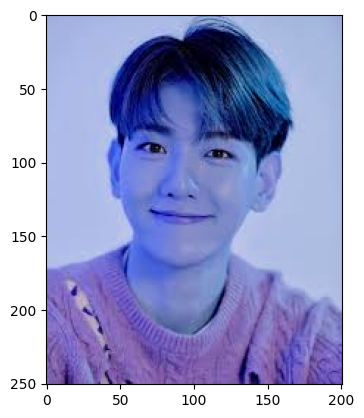

In [131]:
org = cv2.imread("./test/baekhyun_12.jpg")
plt.imshow(org)

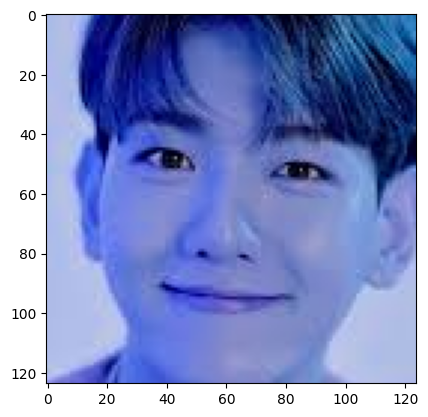

In [132]:
cropped_img = get_cropped_image_if_2_eyes("./test/baekhyun_12.jpg")
plt.imshow(cropped_img)

In [133]:
path_to_data = "./data/"
path_to_cr_data = "./data/cropped"

In [134]:
# taeypng_images, mark_images gibi folder isimlerini img_dirste saklıycaz

import os
img_dirs =[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [135]:
img_dirs

['./data/baekhyun_images',
 './data/mark_images',
 './data/seulgi_images',
 './data/taeyong_images',
 './data/yunjin_images']

In [136]:
# cropped folder yoksa oluşturucam

import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data) #varsa silsin
os.mkdir(path_to_cr_data) #oluştursun

#oluşturdum

In [137]:
cropped_image_dirs =[]
celebrity_file_names_dict ={}

for img_dir in img_dirs:
    count=1
    celebrity_name = img_dir.split('/')[-1] # -1 burada sonuncu eleman demek
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir): #o folderdaki tüm imglara tek tek gitmek için
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder) #yoksa oluşturucak
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped images in folder: " , cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count +=1

baekhyun_images
generating cropped images in folder:  ./data/croppedbaekhyun_images
mark_images
generating cropped images in folder:  ./data/croppedmark_images
seulgi_images
generating cropped images in folder:  ./data/croppedseulgi_images
taeyong_images
generating cropped images in folder:  ./data/croppedtaeyong_images
yunjin_images
generating cropped images in folder:  ./data/croppedyunjin_images


In [138]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split("/")[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'croppedbaekhyun_images': ['./data/croppedbaekhyun_images\\baekhyun_images1.png',
  './data/croppedbaekhyun_images\\baekhyun_images10.png',
  './data/croppedbaekhyun_images\\baekhyun_images11.png',
  './data/croppedbaekhyun_images\\baekhyun_images2.png',
  './data/croppedbaekhyun_images\\baekhyun_images3.png',
  './data/croppedbaekhyun_images\\baekhyun_images4.png',
  './data/croppedbaekhyun_images\\baekhyun_images5.png',
  './data/croppedbaekhyun_images\\baekhyun_images6.png',
  './data/croppedbaekhyun_images\\baekhyun_images7.png',
  './data/croppedbaekhyun_images\\baekhyun_images8.png',
  './data/croppedbaekhyun_images\\baekhyun_images9.png'],
 'croppedmark_images': ['./data/croppedmark_images\\mark_images1.png',
  './data/croppedmark_images\\mark_images10.png',
  './data/croppedmark_images\\mark_images11.png',
  './data/croppedmark_images\\mark_images12.png',
  './data/croppedmark_images\\mark_images13.png',
  './data/croppedmark_images\\mark_images14.png',
  './data/croppedmark_i

## wavelet transformation

yani fotodan önemli özellikleri extract yapıcaz.

In [139]:
import pywt

def w2d(img, mode="haar", level=1):
    imArray = img
    # -- datatype conversions --

    #convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)

    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255;

    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    #process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;

    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H


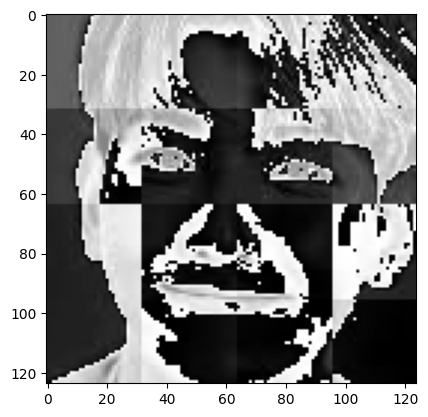

In [140]:
im_har = w2d(cropped_img, "db1", 5)
plt.imshow(im_har, cmap="gray")

In [141]:
X = []
y=[]

# x img, y celebrity names

In [142]:
# y sayı olması gerektiği için

class_dict = {}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count +1
class_dict

{'croppedbaekhyun_images': 0,
 'croppedmark_images': 1,
 'croppedseulgi_images': 2,
 'croppedtaeyong_images': 3,
 'croppedyunjin_images': 4}

In [143]:
#hem raw halini hem de wavelet halini kullanıcaz bu yüzden vertically stacklıyoruz

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, "db1", 5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])



In [144]:
len(X) #cropped resimlerin hepsi

169

In [145]:
len(X[0])

4096

In [146]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(169, 4096)

## MODEL

i will use SVM with rbf kernel tuned with heuristic finetuning

In [147]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [149]:
pipe = Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel="rbf", C=10))])

In [150]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [151]:
pipe.score(X_test,y_test)

0.5581395348837209

In [152]:
len(X_test)

43

In [153]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.33      0.33      0.33         3
           2       0.67      0.18      0.29        11
           3       0.69      0.82      0.75        11
           4       0.50      0.80      0.62        15

    accuracy                           0.56        43
   macro avg       0.44      0.43      0.40        43
weighted avg       0.55      0.56      0.50        43



c:\Users\Betül\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Betül\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Betül\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [154]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [155]:
model_params = {
        "svm": {
            "model": svm.SVC(gamma="auto", probability=True),
            "params": {
                "svc__C": [1,10,100,1000],
                "svc__kernel" : ["rbf", "linear"]
            }
        },
        "random_forest": {
            "model": RandomForestClassifier(),
            "params": {
                "randomforestclassifier__n_estimators": [1, 5,10]
            }
        },
        "logistic_regression": {
            "model": LogisticRegression(solver="liblinear", multi_class="auto"),
            "params": {
                "logisticregression__C": [1,5,10]
            }
        }
    }